In [12]:
import xlrd

sheet = xlrd.open_workbook('parking_tickets_readme.xls').sheet_by_index(0)
for row in range(0,sheet.nrows):
    print(sheet.row(row))

[text:'PARKING TICKET DATA', empty:'']
[empty:'', empty:'']
[text:'ITEM NAME', text:'DESCRIPTION']
[empty:'', empty:'']
[text:'TAG_NUMBER_MASKED', text:'First three (3) characters masked with asterisks']
[text:'DATE_OF_INFRACTION', text:'Date the infraction occurred in YYYYMMDD format']
[text:'INFRACTION_CODE', text:'Applicable Infraction code (numeric)']
[text:'INFRACTION_DESCRIPTION', text:'Short description of the infraction']
[text:'SET_FINE_AMOUNT', text:'Amount of set fine applicable (in dollars)']
[text:'TIME_OF_INFRACTION', text:'Time the infraction occurred  in HHMM format (24-hr clock)']
[text:'LOCATION1', text:'Code to denote proximity (see table below)']
[text:'LOCATION2', text:'Street address']
[text:'LOCATION3', text:'Code to denote proximity (optional)']
[text:'LOCATION4', text:'Street address (optional)']
[text:'PROVINCE', text:'Province or state code of vehicle licence plate']
[empty:'', empty:'']
[empty:'', empty:'']
[text:'Proximity Code Table', empty:'']
[text:'PROX

Items to store in memory:
    -infraction_codes counters for all years
    -fine_amounts for all years
    -top locations for all years (numbers scrubbed)
    -number of tickets per day for all years (graph and raw data)

Predict 2016 parking tickets??!?!?!?
biases in the way tickets are allocated
elections - mayor and riding
between district lines
what are the reason that numbers could vary by space and time?
reduce resolution to see how many unique values remain


In [17]:
import csv
import re
years=['2008','2009','2010','2011','2012','2013','2014','2015']
files_to_open=['data/'+year+'.csv' for year in years]

def test_files(years, files_to_open):
    for file in files_to_open:
        try:
            with open(file,'rt',encoding='utf8') as f:
                reader = csv.DictReader(f)
                line = next(reader)
                print(collapse_address(line['location2']))
                print(file+" success")
        except FileNotFoundError:
            print(file+" failed")
            
test_files(years,files_to_open)

EAST MALL
data/2008.csv success
PRINCES BLVD
data/2009.csv success
DUPONT ST
data/2010.csv success
BRIAN HARRISON WAY
data/2011.csv success
PARKSIDE DR
data/2012.csv success
DANFORTH AVE
data/2013.csv success
SELLERS AVE
data/2014.csv success
CENTRE AVE
data/2015.csv success


In [6]:
import csv
import sys
from collections import defaultdict
from collections import Counter
import re
import copy
import math

def do_round(numbers, n):
    # n=number of sig digits.
    v = 10**n
    return str(math.ceil(int(numbers) / v) * v)
    
def collapse_digits(address, n):
    return re.sub(r'([0-9]+)',
           lambda x: do_round(x.groups()[0], n),
           address)

infraction_codes_dict={}
fine_amounts_dict={}
addresses_dict={}
#dates = defaultdict(int)
csv.field_size_limit(sys.maxsize)
years=['2008','2009','2010','2011','2012','2013','2014','2015']
files_to_open=['data/'+year+'.csv' for year in years]
addresses=[]
for idx,file in enumerate(files_to_open):
    #infraction_codes = defaultdict(int)
    #fine_amounts = defaultdict(int)
    with open(file, 'rt', encoding='utf8') as f:
        reader = csv.DictReader(f)
        for line in reader:
            #infraction_codes[line['infraction_code']]+=1
            #fine_amounts[line['set_fine_amount']]+=1
            addresses.append(collapse_digits(line['location2'],2))
            #dates[line['date_of_infraction']]+=1
    #infraction_codes_dict[years[idx]]=copy.deepcopy(infraction_codes)
    #fine_amounts_dict[years[idx]]=copy.deepcopy(fine_amounts)
    #addresses_dict[years[idx]]=copy.deepcopy(addresses)
    #infraction_codes.clear()
    #fine_amounts.clear()
    #addresses.clear()
    print("PROCESSED "+years[idx])

PROCESSED 2008
PROCESSED 2009
PROCESSED 2010
PROCESSED 2011
PROCESSED 2012
PROCESSED 2013
PROCESSED 2014
PROCESSED 2015


In [16]:
print(addresses['2010'])

[]


In [8]:
import pickle
#pickle.dump(dates,open("dates.pkl","wb"))
pickle.dump(infraction_codes_dict,open("infraction_codes.pkl","wb"))
pickle.dump(fine_amounts_dict,open("fine_amounts.pkl","wb"))
pickle.dump(addresses_dict,open("addresses.pkl","wb"))

In [17]:
#testing address resolution: number of addresses with no street number
#api rate limit = 2500 free requests per day
#fuck google
keyset = set()
for key in addresses_dict.keys():
    keyset.update(addresses_dict[key].keys())
print(len(keyset))

55230


In [16]:
import csv
import sys
from collections import defaultdict
import re

#testing address resolution
def myround(x, base=100):
    return int(base * round(float(x)/base))

def get_number(address):
    numbers_in_address = [int(s) for s in address.split() if s.isdigit()]
    if numbers_in_address:
        return numbers_in_address[0]
    else:
        return None

def collapse_to_street(address):
    return re.sub("^\d+\s|\s\d+\s|\s\d+$", "", address)

csv.field_size_limit(sys.maxsize)
years=['2008','2009','2010','2011','2012','2013','2014','2015']
files_to_open=['data/'+year+'.csv' for year in years]
addresses = set()
for file in files_to_open:
    with open(file, 'rt', encoding='utf8') as f:
        reader = csv.DictReader(f)
        for line in reader:
            addresses.add(line['location2'])
    print("PROCESSED "+file)

PROCESSED data/2008.csv
PROCESSED data/2009.csv
PROCESSED data/2010.csv
PROCESSED data/2011.csv
PROCESSED data/2012.csv
PROCESSED data/2013.csv
PROCESSED data/2014.csv
PROCESSED data/2015.csv


In [15]:
#ADDRESSES VARIABLE = DICT OF SETS OF ADDRESSES UNROUNDED!
count=0
for key in addresses.keys():
    address_count = len(addresses[key])
    if address_count > 1000:
        print(key,address_count)
    count+=address_count
print(count)

DOVERCOURT RD 1118
DUFFERIN ST 1479
BLOOR ST W 2787
YONGE ST 4049
KINGSTON RD 1467
GERRARD ST E 1805
BATHURST ST 1525
QUEEN ST E 2285
WESTON RD 1423
LAKE SHORE BLVD W 1424
DAVENPORT RD 1236
KING ST W 1303
JANE ST 1033
DUNDAS ST W 3003
EGLINTON AVE W 1855
COLLEGE ST 1366
QUEEN ST W 1775
ST CLAIR AVE W 1768
LANSDOWNE AVE 1039
DANFORTH AVE 2624
553931


In [18]:
#ADDRESSES50 VARIABLE = DICT OF SETS OF ADDRESSES ROUNDED TO NEAREST 50!
count=0
for key in addresses50.keys():
    address_count = len(addresses50[key])
    if address_count > 100:
        print(key,address_count)
    count+=address_count
print(count)

DUFFERIN ST 118
BLOOR ST W 179
YONGE ST 218
KINGSTON RD 133
BATHURST ST 130
QUEEN ST E 135
WESTON RD 116
JANE ST 107
KEELE ST 104
DUNDAS ST W 165
EGLINTON AVE W 123
SHEPPARD AVE E 140
COLLEGE ST 108
QUEEN ST W 113
DANFORTH AVE 140
LAWRENCE AVE E 119
87991


In [3]:
#ADDRESSES100 VARIABLE = DICT OF SETS OF ADDRESSES ROUNDED TO 100!
count=0
for key in addresses100.keys():
    address_count = len(addresses100[key])
    if address_count > 100:
        print(key,address_count)
    count+=address_count
print(count)

DUNDAS ST W 112
BLOOR ST W 127
YONGE ST 146
70550


In [9]:
import pickle
adds = pickle.load(open("addresses.pkl","rb"))

In [20]:
import csv
import sys
from collections import defaultdict
from collections import Counter
import re
import copy
import math

def do_round(numbers, n):
    # n=number of sig digits.
    v = 10**n
    return str(math.ceil(int(numbers) / v) * v)
    
def collapse_digits(address, n):
    return re.sub(r'([0-9]+)',
           lambda x: do_round(x.groups()[0], n),
           address)

collapsed_address_map = defaultdict(list)
for address in addresses:
    collapsed_address = collapse_digits(address, 2)
    collapsed_address_map[collapsed_address].append(address)
print(len(collapsed_address_map.keys()))

85452


In [32]:
#print(list(collapsed_address_map.keys())[:30])
def hasNumbers(inputString):
    return any(char.isdigit() for char in inputString)
cam = copy.deepcopy(collapsed_address_map)
ambiguous_addresses = {}
for collapsed_address in collapsed_address_map.keys():
    if not hasNumbers(collapsed_address):
        print(collapsed_address)
        ambiguous_addresses[collapsed_address]=collapsed_address_map[collapsed_address]
        del(cam[collapsed_address])

GRAYSON CR
BULLER AVE
ALLANFORD RD
E/B MILEPOST PLACE
BLOCKING STORAGE ROOM
MOATFIELD DR
WRIGHT AV
PORTAGE AVE
SIDE LAKE SHORE BLVD W
MITCHELL AVE
w DUNCANNON DR
w DUNVEGAN RD
OWEN BLVD
RANLEIGH AVE
BONFIELD AVE
CONWAYAV
FRONT SWT
NICOLAN RD
HAMLYN CRES
IRON ST
LINDSEY AVE
FRONT ST E
FALKIRK ST
RENFREW PL S/S
LEADER LANE
FRIENDLY DR
BOGERT AVE
LAMBTON-KINGSWAY PARK
N/O DEWBOURNE AVE
KENNERLY CRT
MONARCH PARK AVE
BLUEFIN CRES
MAID ST
NEWMILL GT
WALMER RD
m a SPADINA AVE
TANGLE BRIAR WAY
COLLEGE ST/SPADINA AV
CORNER SMCOE STREET
PARKSIDE DR
ROXBOROUGH ST E
DEANLEA CRT
CHILTERN HILL RD
MAYBROOK DR
DONWOODS GRV
VAN HORNE AVE
JAME ST
ELSMERE AVE
BYRON AVE
VIEW GREEN CRES
RAGLAN AVE
GOOCH AV
YORKDALE MALL
BURROWS HALL BLVD
SW CORNER
SHEPPARD AV WEST
FASHION ROSEWAY
MURRIE ST
WORTHINGTON CR
T CRAWFORD ST
BURBANK DR
BURTON RD
RIVER ST/OAK ST
HOLBORNE AVE
GLENGROVE AVE E
CHATSWORTH DRIVE
MALLORY GDNS
ROBERTSTON CRES
STEWART AVE
RAVENSCREST DR
TRESILLIAN RD
WM QUEEN ST W
CONVENT CRT
STADIUM RD
R

TypeError: object of type 'builtin_function_or_method' has no len()

In [34]:
import pickle
pickle.dump(cam,open("collapsed_address_map.pkl","wb"))

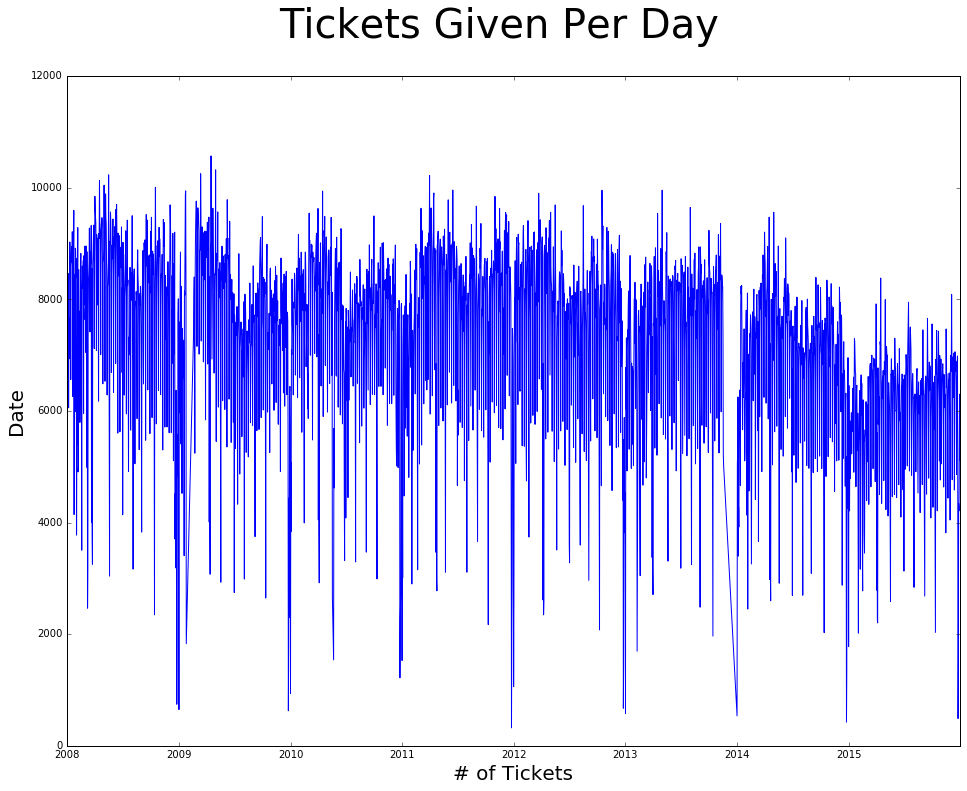

In [38]:
#Plot number of tickets per day
%matplotlib inline

import matplotlib.pyplot as plt
from sortedcontainers import SortedDict
import datetime as dt

sorted_dates = SortedDict(dict(dates))
del sorted_dates['date_of_infraction']
#print(sorted_dates)
x = [dt.datetime.strptime(d,'%Y%m%d').date() for d in sorted_dates.keys()]
fig = plt.figure(figsize=(16,12))
fig.subtitle('Tickets Given Per Day', fontsize=40)
plt.xlabel('# of Tickets', fontsize=20)
plt.ylabel('Date', fontsize=20)
plt.plot(x,sorted_dates.values())
plt.show()

In [71]:
#sort by number of tickets given in that location
#geocode in order
#29 days to geocode
#identify areas where a lot of tickets are given
#look for similarities
#make a map of tokenized address : [all addresses associated]
#goal -- have this done so I can check out the addresses when I'm back in Toronto for Thanksgiving!

print(cam_keys[:100])
print(cam['100 LESMILL RD'])

['300 CONCORD AVE', '100 LESMILL RD', '1000 EGLINTON AVENUE WEST', '1100 REDWOOD AVE', '500 MILLWOOD RD', '18700 BLOOR ST W', '200 LANARK AVE', '100 OLD MILL DR', '100 HEALE AVE', '200 FINCH AVE', '100  WELSFORD GDNS', '100 MASSEY ST', '1700 ERSKINE AV', '2200F QUEEN ST E', '300 DAVISVILLE AVENUE', '100 WEDGEWOOD DR', '100 HANGROVE TERR', '100 100 VARSITY RD', '100 HOLLAND PK AV', '300 MAPLE HURST AVE', '1700 EGLIINTON AVE W', '200 GRENADIER RD', 'ANVIL MILLWAY UNIT #100', '100a NATAL AVE', '200 ENCHANTED HILL CR', '300a LEE AVE', '100a ELLERSLIE AVE', '100 BYNG AVE', '200 MARETTA AVE', '-400 MILLWOOD RD', '300 STAYNER AVE', '100 SPRING GARDENS AVE', '100 FROST KING LA', '372100 AVENUE RD', '300 ALTON TOWERS CRCL', '300 MELITA AVENUE', '100h MC ALPINE ST', '4500 QUEEN ST E', '100a WHITE AVE', '100  FAIRLAWN AVE', '100 ROCHFORT DRIVE', '2400 FINCH AVE E', 'l100 LORNE BRUCE DR', '100 YORK', 'GREEN PLOT #200', '100 ROYAL DOULTON DR', '500 CRAWFORD ST', '100 LANGFOR AV', '400 MORINGSIDE AV

In [ ]:
from geopy.geocoders import Nominatim
from pymongo import MongoClient
import time

print(len(cam.keys()))
dbconn = MongoClient()
db = dbconn.parking.addresses

print(db.count())

geocoder = Nominatim()
no_matches = []
count=0
for address in cam_keys:
    print("getting coordinates for "+address)
    if db.find({'collapsed_address': address}) == 0:
        address_str=address+", TORONTO, ON"
        location = geocoder.geocode(address_str)
        if location:
            print(address)
            for actual_address in cam[address]:
                record = {'actual_address':actual_address, 'collaped_address':address, 'latitude':location.latitude, 'longitude':location.longitude}
                db.insert_one(record)
        else:
            print(address)
            no_matches.append(address)
    #time.sleep(15)
    #if count%100 == 0:
        #print(idx)
    #count+=1

74239
105
getting coordinates for 300 CONCORD AVE
getting coordinates for 100 LESMILL RD
getting coordinates for 1000 EGLINTON AVENUE WEST
getting coordinates for 1100 REDWOOD AVE
getting coordinates for 500 MILLWOOD RD
getting coordinates for 18700 BLOOR ST W
getting coordinates for 200 LANARK AVE
getting coordinates for 100 OLD MILL DR
getting coordinates for 100 HEALE AVE
getting coordinates for 200 FINCH AVE
getting coordinates for 100  WELSFORD GDNS
getting coordinates for 100 MASSEY ST
getting coordinates for 1700 ERSKINE AV
getting coordinates for 2200F QUEEN ST E
getting coordinates for 300 DAVISVILLE AVENUE
getting coordinates for 100 WEDGEWOOD DR
getting coordinates for 100 HANGROVE TERR
getting coordinates for 100 100 VARSITY RD
getting coordinates for 100 HOLLAND PK AV
getting coordinates for 300 MAPLE HURST AVE
getting coordinates for 1700 EGLIINTON AVE W
getting coordinates for 200 GRENADIER RD
getting coordinates for ANVIL MILLWAY UNIT #100
getting coordinates for 100a N

In [96]:
dbconn.close()

In [53]:
string = '149 langford ave'
addition = ', Toronto, ON'
string+=addition

In [82]:
db.find({'collapsed_address':'asdf'}).count()

0